In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Reading the train data from drive
lstm_train = pd.read_csv('/content/drive/MyDrive/Dataset for Models/train_final.csv')
#Reading the train data from drive
lstm_test = pd.read_csv('/content/drive/MyDrive/Dataset for Models/test_final.csv')
#Reading the train data from drive
lstm_validation = pd.read_csv('/content/drive/MyDrive/Dataset for Models/validation_final.csv')

In [ ]:

y_train = lstm_train['label']

y_valid = lstm_validation['label']

y_test = lstm_test['label']

In [ ]:
# Combine the tokenized text from your data_frames
all_text = np.concatenate([lstm_train['text'], lstm_validation['text'], lstm_test['text']])

Tokenization of data

In [ ]:
# Tokenization and Sequence Conversion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_text)
X_train_seq = tokenizer.texts_to_sequences(lstm_train['text'])
X_valid_seq = tokenizer.texts_to_sequences(lstm_validation['text'])
X_test_seq = tokenizer.texts_to_sequences(lstm_test['text'])

In [ ]:
# Padding sequences
max_sequence_length = max(map(len, X_train_seq + X_valid_seq + X_test_seq))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

In [ ]:
# Define the LSTM Model
embedding_dim = 50  # Embedding Dimension
lstm_units = 64     # LSTM Units
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(lstm_units, return_sequences=True),
    Dropout(0.5),
    LSTM(lstm_units),
    Dense(2, activation='softmax')
])


In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model (You might need to adjust the number of epochs and batch size according to your needs)
lstm_model.fit(X_train_padded, y_train, validation_data=(X_valid_padded, y_valid), epochs= 5, batch_size=16)

Epoch 1/5
293/293 [==============================] - 1184s 4s/step - loss: 0.6940 - accuracy: 0.4946 - val_loss: 0.6922 - val_accuracy: 0.5468
Epoch 2/5
293/293 [==============================] - 1124s 4s/step - loss: 0.6934 - accuracy: 0.4995 - val_loss: 0.6968 - val_accuracy: 0.4532
Epoch 3/5
293/293 [==============================] - 1128s 4s/step - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.7008 - val_accuracy: 0.4532
Epoch 4/5
293/293 [==============================] - 1067s 4s/step - loss: 0.6936 - accuracy: 0.5054 - val_loss: 0.6962 - val_accuracy: 0.4532
Epoch 5/5
293/293 [==============================] - 1128s 4s/step - loss: 0.6933 - accuracy: 0.5089 - val_loss: 0.6942 - val_accuracy: 0.4532


In [ ]:
# Evaluate the model on the test dataset
y_valid_pred_probs = lstm_model.predict(X_valid_padded)
y_valid_pred_classes = np.argmax(y_valid_pred_probs, axis=1)

# Calculate accuracy
valid_accuracy = accuracy_score(y_valid, y_valid_pred_classes)
print("valid Accuracy:", valid_accuracy)

# Calculate precision
valid_precision = precision_score(y_valid, y_valid_pred_classes, average='weighted')
print("valid Precision:", valid_precision)

# Calculate recall
valid_recall = recall_score(y_valid, y_valid_pred_classes, average='weighted')
print("valid Recall:", valid_recall)

# Calculate F1 score
valid_f1_score = f1_score(y_valid, y_valid_pred_classes, average='weighted')
print("valid F1 Score:", valid_f1_score)


32/32 [==============================] - 55s 2s/step
valid Accuracy: 0.4531872509960159
valid Precision: 0.20537868446532595
valid Recall: 0.4531872509960159
valid F1 Score: 0.2826596287912093


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate the model on the test dataset
y_test_pred_probs = lstm_model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print("Test Accuracy:", test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, y_test_pred_classes, average='weighted')
print("valid Precision:", test_precision)

# Calculate recall
test_recall = recall_score(y_test, y_test_pred_classes, average='weighted')
print("valid Recall:", test_recall)

# Calculate F1 score
test_f1_score = f1_score(y_test, y_test_pred_classes, average='weighted')
print("valid F1 Score:", test_f1_score)


32/32 [==============================] - 53s 2s/step
Test Accuracy: 0.5054726368159204
valid Precision: 0.2555025865696393
valid Recall: 0.5054726368159204
valid F1 Score: 0.3394317243919201


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


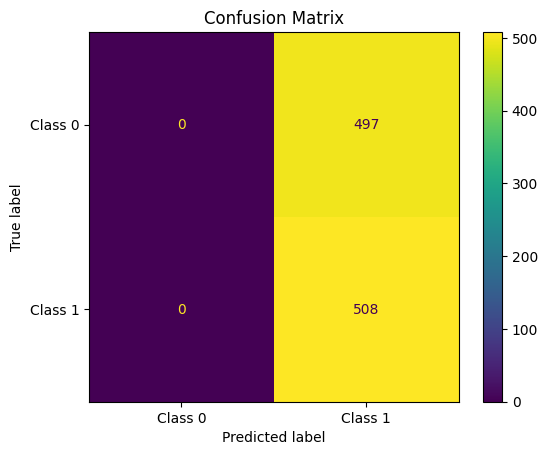

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_classes)

# Plot the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
cmd.plot()
plt.title("Confusion Matrix")
plt.show()


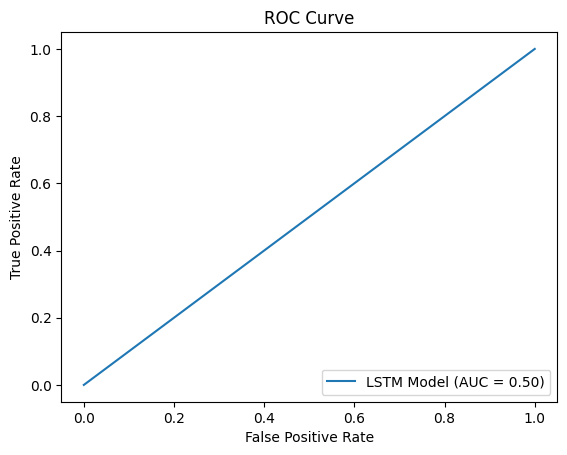

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs[:, 1])

# Calculate the ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
rcd = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LSTM Model')
rcd.plot()
plt.title("ROC Curve")
plt.show()
